<div>
<a href="https://github.com/groupmm/edu_novfct"><img src="data/Edu_NovFct_Teaser.png" width=100% style="float: right;" alt="ENF Teaser"></a>
</div>

<div>
<h2>Figure 5<br> <small>Illustration of precision, recall, and F-measure with error tolerance. </small></h2> </div>

This notebook provides code for reproducing the subfigures of Figure 5 of the paper.
- Figure 5a: Novelty function with estimated positions and reference positions.
- Figure 5b: Illustration of reference positions (Ref), true positives (TP), false positives (FP), and false negatives (FN) with error tolerance.

### Figure 5a
Novelty function with estimated positions (blue dotted lines) and reference positions (red dashed lines).

In the following code cell, we do the following:
* Import all necessary libraries and functions used in the notebook.
* Set the configurations for the figures.
* Load a novelty function and apply peak picking to dervie some beat estimations.
* Load the beat annotations, and visualize the estimations and annotations.

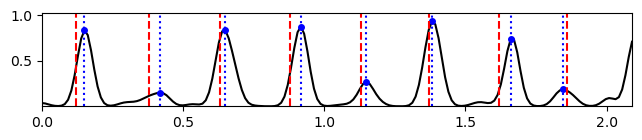

In [1]:
import numpy as np
import os 
from scipy import signal
from matplotlib import pyplot as plt
import mir_eval.util as util

import libfmp.b
import libfmp.c6

%matplotlib inline

### Settings of the figures
export = False
figsize_nov = (6.52,1.5)
figsize_ann = (8, 0.5)
figsize_eval = (6.4, 1.6)
dpi = 100
plot_ylim = [0,1.1]
tol = 0.025 # tolerance in second

### Figure05a
### Evluate the peak picking estimation using F-measure
# Read a novelty function
data = np.load('./data/example_data.npy', allow_pickle = True).item()
nov = data['nov']
dur = data['dur']
Fs_nov = data['Fs']

# Use local average as local threhold of the peak picker
peaks = signal.find_peaks(nov, height=0.15)[0]

# Read beat annotations
fn_ann = os.path.join('./data/example_ann.csv')
ann, label_keys = libfmp.c6.read_annotation_pos(fn_ann, label='beat', header=0)

# Plot the novelty function, picked peaks, and annotated beats
libfmp.b.plot_signal(nov, Fs_nov, color='k', dpi=dpi, figsize=figsize_nov, xlabel='')
plt.plot(peaks/Fs_nov, nov[peaks], linestyle = '', marker='o', markersize=4, color='b')
beat_times = [i[0] for i in ann]
plt.vlines(beat_times, plot_ylim[0], plot_ylim[1], color = 'red', linestyle = 'dashed')
plt.vlines(peaks/Fs_nov, plot_ylim[0], plot_ylim[1], color = 'blue', linestyle = 'dotted')
plt.xticks(np.arange(0, len(nov)/Fs_nov, 0.5), np.arange(0, len(nov)/Fs_nov, 0.5) )
plt.tight_layout()
output_path= os.path.join('./export/Figure05a.png')
if export == True:
    plt.savefig(output_path)

### Figure 5b
In the following code cell, we do the following:
* Convert the frames indices of estimated beats into seconds.
* Derive the true positives, false positives, and false negatives using mir_eval library
* Visualize the above cases with the error tolerance. 

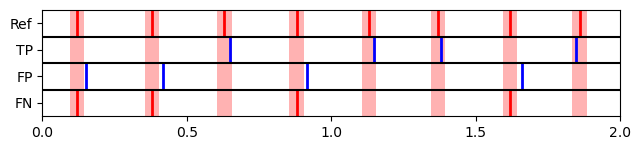

In [2]:
### Figure05b
### Visualize the tolerance, TP, FP, FN
def match2correct(matching):
    ### extract indices of correct estimations
    est_cid = []
    for ann_id, est_id in matching:
        est_cid.append(est_id)
    return est_cid

def match2TP(est, matching):
    est_cid = match2correct(matching)
    est_id_arr = np.zeros(est.shape)
    est_id_arr[est_cid]=1
    
    tp_times = est[np.where(est_id_arr==1)[0]]
    return tp_times

def match2FP(est, matching):
    est_cid = match2correct(matching)
    est_id_arr = np.ones(est.shape)
    est_id_arr[est_cid]=0
    
    fp_times = est[np.where(est_id_arr==1)[0]]
    return fp_times

def match2FN(ref, matching):
    ### extract indices of detected reference beats
    ref_cid = [i[0] for i in matching]
    ref_id_arr = np.ones(len(ref))
    ref_id_arr[ref_cid] = 0 ## exclude all the detected ones and keep the missed ones
    
    fn_times = ref[np.where(ref_id_arr==1)[0]]
    return fn_times

### Convert the frames indices of estimated beats into seconds.
reference_beats = beat_times
estimated_beats = peaks/Fs_nov
### Derive the true positives, false positives, and false negatives using mir_eval library
matching = util.match_events(reference_beats, estimated_beats, tol)
fps = match2FP(estimated_beats, matching)
tps = match2TP(estimated_beats, matching)
fns = match2FN(np.array(reference_beats), matching)

### Settings for visualization
vline_list = [[tp, 'TP'] for tp in tps] + \
             [[fn, 'FN'] for fn in fns] + \
             [[fp, 'FP'] for fp in fps] + \
             [[beat, 'Ref'] for beat in beat_times]
label_keys = {'Ref': {'linewidth': 2, 'color': 'r'},
              'TP': {'linewidth': 2, 'color': 'blue'},
              'FN': {'linewidth': 2, 'color': 'red'}, 
             'FP': {'linewidth': 2, 'color': 'blue'}}
sort_labels = [ 'Ref','TP', 'FP',  'FN']
sort_labels.reverse()
fig, ax = libfmp.b.plot_annotation_multiline(vline_list, label_keys=label_keys, 
                                   sort_labels=sort_labels,  dpi=dpi, figsize=figsize_eval)

for k in range(len(beat_times)):
    ax.fill_between([beat_times[k] -tol, beat_times[k] +tol], 
                     -1, 4.05, facecolor='red', alpha=0.3)
ax.set_xticks(np.arange(0, dur, 0.5), np.arange(0, dur, 0.5))



output_path = os.path.join('./export/Figure05b.png')
if export == True:
    plt.savefig(output_path)

### Further Notes and Links
<ul>
<li><span style="color:black">
Meinard Müller and Ching-Yu Chiu: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Basic Tutorial on Novelty and Activation Functions for Music Signal Processing.</strong></a> Transaction of the International Society for Music Information Retrieval (TISMIR), ??: ??–??, 2024. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="./data/bibtex_MuellerC24_EduNovFct_TISMIR.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://github.com/groupmm/edu_novfct">GitHub</a></span></li>
</ul> 


<div>
<a href="https://opensource.org/licenses/MIT"><img src="data/Edu_NovFct_License.png" width=100% style="float: right;" alt="ENF License"></a>
</div>